In [18]:
# Install yfinance
!pip install yfinance --quiet



In [19]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# Step 1: Load Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2015-01-01', end='2025-01-01', auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [21]:
# Step 2: Previous Day Features

data['Prev_Open'] = data['Open'].shift(1)
data['Prev_High'] = data['High'].shift(1)
data['Prev_Low'] = data['Low'].shift(1)
data['Prev_Volume'] = data['Volume'].shift(1)


In [22]:
# Step 3: Moving Averages

data['MA_5'] = data['Close'].rolling(5).mean()
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()

In [23]:
# Step 4: Daily Return

data['Daily_Return'] = data['Close'].pct_change() * 100

In [24]:
#Step 5: High-Low Difference

data['High_Low_Diff'] = data['High'] - data['Low']

In [25]:
# Step 6: Drop NaN rows

data = data.dropna()

In [26]:
# Step 7: Features and Target

X = data[['Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume',
          'MA_5', 'MA_10', 'MA_20', 'Daily_Return', 'High_Low_Diff']]
y = data['Close'].values  # 1D array for scikit-learn

In [27]:
# Step 8: Train-Test Split (Time-Series)

split_index = int(len(data) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [28]:
# Step 9: Train Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [29]:
# Step 10: Evaluate Models

def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} -> RMSE: {rmse:.2f}, R2: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression -> RMSE: 1.69, R2: 1.00
Random Forest -> RMSE: 29.51, R2: -0.12
Gradient Boosting -> RMSE: 29.07, R2: -0.09


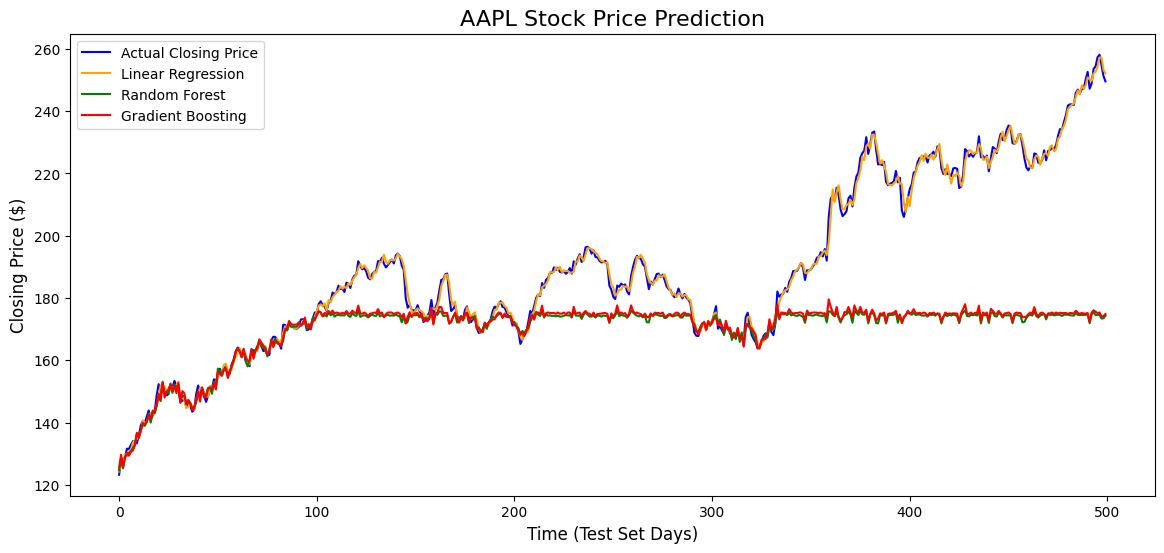

In [31]:

# Step 11: Visualization

plt.figure(figsize=(14,6))

# Plot actual and predicted prices
plt.plot(y_test, label='Actual Closing Price', color='blue')
plt.plot(y_pred_lr, label='Linear Regression', color='orange')
plt.plot(y_pred_rf, label='Random Forest', color='green')
plt.plot(y_pred_gb, label='Gradient Boosting', color='red')

# Add title and labels
plt.title(f'{stock_symbol} Stock Price Prediction', fontsize=16)
plt.xlabel('Time (Test Set Days)', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)

# Add legend
plt.legend()

# Save figure to file (optional, for GitHub README)
plt.savefig('stock_price_prediction.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
